# **Large Language Models with GPT & LangChain**

[ChatGPT](https://chat.openai.com/) is wildly popular, with over a billion visits per month. Although this web interface is great for many non-technical use cases, for programming and automation tasks, it is better to access GPT (the AI that powers ChatGPT) via the OpenAI API.

As well as GPT, you'll also make use of LangChain, a programming framework for working with generative AI.

You'll cover:

- Getting set up with an OpenAI developer account and integration with Workspace.
- Calling the chat functionality in the OpenAI API, with and without langchain.
- Simple prompt engineering.
- Holding a conversation with GPT.
- Ideas for incorporating GPT into a data analysis or data science workflow.

You'll be using GPT to explore [a dataset](https://catalog.data.gov/dataset/electric-vehicle-population-data) about electric cars in Washington state, USA.

# **Before You Begin**

**Create a developer account with OpenAI**

1. Go to the [API signup page](https://platform.openai.com/signup).

2. Create your account (you'll need to provide your email address and your phone number).

3. Go to the [API keys page](https://platform.openai.com/account/api-keys).

4. Create a new secret key.

5. **Take a copy of it**. (If you lose it, delete the key and create a new one.)

 **Add a payment method**

OpenAI sometimes provides free credits for the API, but it's not clear if that is worldwide or what the conditions are. You may need to add debit/credit card details.

**The API costs [$0.002 / 1000 tokens](https://openai.com/pricing) for GPT-3.5-turbo. [1000 tokens is about 750 words](https://help.openai.com/en/articles/4936856-what-are-tokens-and-how-to-count-them). Each project should cost less than 10 US cents (but if you rerun tasks, you will be charged every time).**

1. Go to the [Payment Methods page](https://platform.openai.com/account/billing/payment-methods).

2. Click Add payment method.

3. Fill in your card details.

## Task 0: Setup

We need to install the `langchain` package. This is currently being developed quickly, sometimes with breaking changes, so we fix the version.

The `langchain` depends on a recent version of `typing_extensions`, so we need to update that package, again fixing the version.

### Instructions

Run the following code to install `langchain` and `typing_extensions`.

In [4]:
pip install python-dotenv

In [6]:
import os
import openai
from dotenv import load_dotenv

# Load the environment variables from the .env file
load_dotenv()

# Set the OpenAI API key from the environment variable
openai.api_key = os.getenv("") # generate your OpenAI keys here


In [ ]:
# Lock OpenAI to version 0.27.1
!pip install openai==0.27.1
# Install the langchain package
!pip install langchain==0.0.300

In [ ]:
# Update the typing_extensions package
!pip install typing_extensions==4.8.0

In order to chat with GPT, we need first need to load the `openai` and `os` packages to set the API key from the environment variables you just created.

### Instructions

- Import the `os` package.
- Import the `openai` package.
- Set `openai.api_key` to the `OPENAI_API_KEY` environment variable.

In [7]:
# Import the os package
import os

# Import the openai package
import openai
# Set openai.api_key to the OPENAI_API_KEY environment variable
from dotenv import load_dotenv
load_dotenv()
openai.api_key = os.getenv("OPENAI_API_KEY")

We need to import the `langchain` package. It has many submodules, so to save typing later, we'll also import some specific functions from those submodules.

### Instructions

- Import the `langchain` package as `lc`.
- From the `langchain.chat_models` module, import `ChatOpenAI`.
- From the `langchain.schema` module, import `AIMessage`, `HumanMessage`, `SystemMessage`.

In [8]:
# Import the langchain package as lc
import langchain as lc

# From the langchain.chat_models module, import ChatOpenAI
from langchain.chat_models import ChatOpenAI

# From the langchain.schema module, import AIMessage, HumanMessage, SystemMessage
from langchain.schema import AIMessage, HumanMessage, SystemMessage

You'll also need to do some light data manipulation with the `pandas` package and data visualization with `plotly.express`.  Finally, the `IPython.display` pacakges contains functions to prettily display Markdown content.

### Instructions

Import the following packages.

- Import `pandas` using the alias `pd`.
- Import `plotly.express` using the alias `px`.
- From the `IPython.display` package, import `display` and `Markdown`.
- etc.

In [9]:
# Import pandas using the alias pd
import pandas as pd

# Import plotly.express using the alias px
import plotly.express as px

# From the IPython.display package, import display and Markdown
from IPython.display import display, Markdown

## Task 1: Import the Electric Cars Data

The electric cars data is contained in a CSV file named `electric_cars.csv`.

Each row in the dataset represents the count of the number of cars registered within a city, for a particular model.

The dataset contains the following columns.

- `city` (character): The city in which the registered owner resides.
- `county` (character): The county in which the registered owner resides.
- `model_year` (integer): The [model year](https://en.wikipedia.org/wiki/Model_year#United_States_and_Canada) of the car.
- `make` (character): The manufacturer of the car.
- `model` (character): The model of the car.
- `electric_vehicle_type` (character): Either "Plug-in Hybrid Electric Vehicle (PHEV)" or "Battery Electric Vehicle (BEV)".
- `n_cars` (integer): The count of the number of vehicles registered.

Our first step is to import and print the data.

### Instructions

Import the electric cars data to a pandas dataframe.

- Read the data from `electric_cars.csv`. Assign to `electric_cars`.
- Display a description of the numeric columns of `electric_cars`.
- Display a description of the object columns of `electric_cars`.
- Print the whole dataset.

In [10]:
# Read the data from electric_cars.csv. Assign to electric_cars.
electric_cars = pd.read_csv("/content/electric_cars.csv")

# Display a description of the numeric columns
print("Description of numeric columns\n")
display(electric_cars.describe())

# Display a description of the text (object) columns
print("Description of text columns\n")
display(electric_cars.describe(include="O"))

# Print the whole dataset
print("The electric cars dataset\n")
display(electric_cars)

Description of numeric columns



,model_year,n_cars
count,26813.000000,26813.000000
mean,2019.375527,5.612166
std,3.286257,26.997325
min,1997.000000,1.000000
25%,2017.000000,1.000000
50%,2020.000000,2.000000
75%,2022.000000,4.000000
max,2024.000000,1514.000000


Description of text columns



,city,county,make,model,electric_vehicle_type
count,26813,26813,26813,26813,26813
unique,683,183,37,127,2
top,Bothell,King,TESLA,LEAF,Battery Electric Vehicle (BEV)
freq,479,7066,5071,1889,15885


The electric cars dataset



,city,county,model_year,make,model,electric_vehicle_type,n_cars
0,Seattle,King,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),1514
1,Seattle,King,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),1153
2,Seattle,King,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),1147
3,Seattle,King,2022,TESLA,MODEL Y,Battery Electric Vehicle (BEV),1122
4,Bellevue,King,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),931
...,...,...,...,...,...,...,...
26808,Lakewood,Pierce,2022,BMW,IX,Battery Electric Vehicle (BEV),1
26809,Lakewood,Pierce,2022,BMW,X5,Plug-in Hybrid Electric Vehicle (PHEV),1
26810,Lakewood,Pierce,2022,FORD,TRANSIT,Battery Electric Vehicle (BEV),1
26811,Lakewood,Pierce,2022,HYUNDAI,KONA ELECTRIC,Battery Electric Vehicle (BEV),1


## Task 2: Asking GPT a Question

Let's start by sending a message to GPT and getting a response. For now, we won't worry about including any details about the dataset&mdash;it's the equivalent of asking "is this microphone turned on?".

We'll also skip using langchain for now so you can see more clearly how the `openai` packages works.

### Types of Message

There are three types of message, documented in the [Introduction](https://platform.openai.com/docs/guides/chat/introduction) to the Chat documentation. We'll use two of them here.

- `system` messages describe the behavior of the AI assistant. If you don't know what you want, try "You are a helpful assistant".
- `user` messages describe what you want the AI assistant to say. We'll cover examples of this today.

### Instructions

Send a question to GPT and get a response.

- Define the system message as follows and assign to `system_msg_test`.

```
"""You are a helpful assistant who understands data science.
 You write in a clear language that a ten year old can understand.
 You keep your answers brief.""".
```
    
- Define the user message as follows and assign to `user_msg_test`.

```
"Tell me some uses of GPT for data analysis."
```

- Create a message list from the system and user messages. Assign to `msgs_test`.
- Send the messages to GPT. Assign to `rsps_test`.

<details>
<summary>Code hints</summary>
<p>
        
The `openai.ChatCompletion.create()` function expects the messages in the form of a list of dictionaries, each with a `role` and `content` element.
        
```
messages = [
    {"role": "system", "content": system_msg},
    {"role": "user", "content": user_msg}
]
```

</p>
</details>

In [13]:
import openai

# Set your API key directly for testing purposes (not recommended for production)
openai.api_key = ""

# Define the system message. Assign to system_msg_test.
system_msg_test = """You are a helpful assistant who understands data science.
 You write in a clear language that a ten year old can understand.
 You keep your answers brief."""
# Define the user message. Assign to user_msg_test.
user_msg_test = "Tell me some uses of GPT for data analysis."

# Create a message list from the system and user messages. Assign to msgs_test.
msgs_test = [
    {"role": "system", "content": system_msg_test},
    {"role": "user", "content": user_msg_test}
]

# Send the messages to GPT. Assign to rsps_test.
rsps_test = openai.ChatCompletion.create(
    model="gpt-3.5-turbo",
    messages=msgs_test
)

Now you need to explore the response. The result is a highly nested object. As well as the text response that we want, there's a lot of metadata. You'll print the whole thing so you can see the structure, and extract just the text content.

### Instructions

Print the whole response and just the text content.

- Print the whole response.
- Print just the response's content.

<details>
<summary>Code hints</summary>
<p>
        
Buried within the response variable is the text we asked GPT to generate. Luckily, it's always in the same place.
        
```
response["choices"][0]["message"]["content"]
```

</p>
</details>

In [14]:
# Print the whole response
print("The whole response\n")
print(rsps_test)

print("\n\n----\n\n")

# Print just the response's content
print("Just the response's content\n")
print(rsps_test["choices"][0]["message"]["content"])

The whole response

{
  "choices": [
    {
      "finish_reason": "stop",
      "index": 0,
      "logprobs": null,
      "message": {
        "content": "GPT can be used for text analysis, data summarization, generating insights from large amounts of data, and even for forecasting trends based on historical data.",
        "role": "assistant"
      }
    }
  ],
  "created": 1715174880,
  "id": "chatcmpl-9MbcuwlzftikeHb1gbr2K5kpsAkdP",
  "model": "gpt-3.5-turbo-0125",
  "object": "chat.completion",
  "system_fingerprint": null,
  "usage": {
    "completion_tokens": 31,
    "prompt_tokens": 52,
    "total_tokens": 83
  }
}


----


Just the response's content

GPT can be used for text analysis, data summarization, generating insights from large amounts of data, and even for forecasting trends based on historical data.


## Task 3: Asking a Question About the Dataset

Now we know that GPT is working, we can start asking questions about data analysis. Because we have details of our dataset, we can pass these in to our prompt to improve the quality of the mesages we get back.

Another change that we're going to make is to use the `langchain` package, which provides a convenience layer on top of the `openai` package.

### Why should we use LangChain?

The code in the previous task used complicated nested objects in two places (the list of dictionaries for the message, and the dictionary of lists and dictionaries for the response). This sort of object is common in web application development, but not in data analysis, where rectangular data (pandas DataFrames and SQL tables) is the more common.

One of the advantages of LangChain is that it simplifies the code for some tasks, letting you avoid messing about with too many square brackets and curly braces as you navigate these deep objects.

Secondly, if you want to swap GPT for a different model at a later date (as you might in a corporate setting), it can be easier to do so if you use the `langchain` package rather than the `openai` package directly.

### LangChain message types

The LangChain message types are names slightly differently from the OpenAI message types.

- `SystemMessage` is the equivalent of OpenAI's `system` message.
- `HumanMessage` is the equivalent of OpenAI's `user` message.

### Instructions

Create a prompt that includes dataset details.

- _Read the description of the dataset that is provided._
- Create a task for the AI. Assign to `suggest_questions`.
    - Use the text `"Suggest some data analysis questions that could be answered with this dataset."`.
- Concatenate the dataset description and the request. Assign to `msgs_suggest_questions`.
    - The first message is a system message with the content `"You are a data analysis expert."`.
    - The second message is a human message with `dataset_description` and `suggest_questions` concatenated with two line breaks in between.

In [22]:
# A description of the dataset
dataset_description = """
You have a dataset about electric cars registered in Washington state, USA in 2020. It is available as a pandas DataFrame named `electric_cars`.

Each row in the dataset represents the count of the number of cars registered within a city, for a particular model.

The dataset contains the following columns.

- `city` (character): The city in which the registered owner resides.
- `county` (character): The county in which the registered owner resides.
- `model_year` (integer): The [model year](https://en.wikipedia.org/wiki/Model_year#United_States_and_Canada) of the car.
- `make` (character): The manufacturer of the car.
- `model` (character): The model of the car.
- `electric_vehicle_type` (character): Either "Plug-in Hybrid Electric Vehicle (PHEV)" or "Battery Electric Vehicle (BEV)".
- `n_cars` (integer): The count of the number of vehicles registered.
"""

# Create a task for the AI. Assign to suggest_questions.
suggest_questions = "Suggest some data analysis questions that could be answered with this dataset."

# Concatenate the dataset description and the request. Assign to msgs_suggest_questions.
msgs_suggest_questions = [
    SystemMessage(content= "You are a data analysis expert."),
    HumanMessage(content= f"{dataset_description}\n\n{suggest_questions}")

]

### Instructions

- Create a `ChatOpenAI` object. Assign to `chat`.
- Pass your message to GPT. Assign to `rsps_suggest_questions`.
- Print the response object and the contents of the response.
- Print the type of the response

In [23]:

# Create a ChatOpenAI object. Assign to chat.
chat = ChatOpenAI(openai_api_key="") # Your API Keys go here


# Pass your message to GPT. Assign to rsps_suggest_questions.
rsps_suggest_questions = chat(msgs_suggest_questions)

# Print the response
print("The whole response\n")
print(rsps_suggest_questions)

print("\n----\n")

# Print just the response's content
print("Just the response's content\n")
print(rsps_suggest_questions.content)

print("\n----\n")

# Print the type of the response
print("The type of the response\n")
print(type(rsps_suggest_questions))

The whole response

content='Here are some data analysis questions that could be answered using the provided dataset `electric_cars`:\n\n1. What is the distribution of electric vehicle types (PHEV vs. BEV) in Washington state in 2020?\n2. Which city had the highest number of electric cars registered in 2020?\n3. What are the top 5 most popular electric car models registered in Washington state in 2020?\n4. How does the distribution of electric car models vary by county in Washington state?\n5. What is the average number of electric cars registered per city in Washington state in 2020?\n6. Is there a correlation between the model year of electric cars and the number of cars registered?\n7. Which manufacturer had the highest number of electric cars registered in Washington state in 2020?\n8. Are there any cities where only one type of electric vehicle (PHEV or BEV) is predominantly registered?\n9. How does the distribution of electric car models differ between PHEVs and BEVs?\n10. Is the

## Task 4: Hold a conversation with GPT

Notice that the response from GPT was a dictionary-like object. The most useful part of this is the `.content` element, which contains the text response to your prompt.

While a single prompt and response can be useful, often you want to have a longer conversation with GPT. In this case, you can pass previous messages so that GPT can "remember" what was said before.

### AI messages

The response from GPT had type `AIMessage`. By distinguishing `AIMessage`s from the `HumanMessage`s, you can tell who said what in a conversation with the AI.

### Displaying Markdown content

When GPT generates code as an output, it if often formatted as a Markdown code block inside triple backticks. You can display Markdown output more beautifully in Workspace by swapping `print()` for the `display()` and `Markdown()` functions.

```py
display(Markdown(your_markdown_text))
```

### Instructions

Append another prompt to the conversation and chat with GPT again.

- Append the response and a new message to the previous messages. Assign to `msgs_python_top_models`.
- Pass your message to GPT. Assign to `rsps_python_top_models`.
- Display the response's Markdown content.

In [25]:
# Append the response and a new message to the previous messages.
# Assign to msgs_python_top_models.
msgs_python_top_models = msgs_suggest_questions + [
     rsps_suggest_questions,
     HumanMessage(content= "Write Python code to find the make/model combinations of electric car in Washington state.")
]

# Pass your message to GPT. Assign to rsps_python_top_models.
rsps_suggest_questions = chat(msgs_python_top_models)

# Display the response's Markdown content
display(Markdown(rsps_suggest_questions.content))

You can find the unique make/model combinations of electric cars in Washington state using the following Python code snippet:

```python
# Filter the dataset to include only electric cars
electric_cars = electric_cars[electric_cars['electric_vehicle_type'].str.contains('Electric Vehicle', case=False)]

# Get unique make/model combinations
make_model_combinations = electric_cars.groupby(['make', 'model']).size().reset_index(name='count')

# Display the unique make/model combinations
print(make_model_combinations[['make', 'model']])
```

In this code:
1. We first filter the dataset to include only electric cars by checking if the 'electric_vehicle_type' column contains the phrase "Electric Vehicle" (case insensitive).
2. Then, we group the data by 'make' and 'model' columns and count the number of occurrences.
3. Finally, we display the unique make/model combinations along with the count of each combination.

This code will provide you with a list of unique make/model combinations of electric cars registered in Washington state.

## Task 5: Execute the Code Provided by GPT

You just asked GPT to write some code for you. Next you need to see if it worked, and fix it if it didn't.

This is a standard workflow for interacting with generative AI: the AI acts as a junior data analyst who writes the code, then you act as the boss who reviews the work.

### Instructions

Review the work of your AI assistant.

- Copy and paste the code generated by GPT into the next code cell and run it.
- _Look at the result. Do you think it is correct?_*
- If the code threw an error or gave a wrong answer, use the Workspace AI Assistant (also powered by GPT!) to fix and explain the code.

*During testing of this code-along project, GPT sometimes wrote incorrect code when using `.sum()`. Double-check those function calls.

In [26]:
# Paste the code generated by GPT and run it
# Filter the dataset to include only electric cars
electric_cars = electric_cars[electric_cars['electric_vehicle_type'].str.contains('Electric Vehicle', case=False)]

# Get unique make/model combinations
make_model_combinations = electric_cars.groupby(['make', 'model']).size().reset_index(name='count')

# Display the unique make/model combinations
print(make_model_combinations[['make', 'model']])


                     make   model
0              ALFA ROMEO  TONALE
1                    AUDI      A3
2                    AUDI      A7
3                    AUDI    A8 E
4                    AUDI  E-TRON
..                    ...     ...
122                 VOLVO     V60
123                 VOLVO    XC40
124                 VOLVO    XC60
125                 VOLVO    XC90
126  WHEEGO ELECTRIC CARS  WHEEGO

[127 rows x 2 columns]


## Task 6: Continue the Conversation to Create a Plot

Doing more analysis with GPT assistance is simply a case of continuing the conversation by appending new `HumanMessage` prompts to the message list, and calling the `chat()` function.

The output from GPT is random, but when doing data analysis this isn't always desirable since you'd like your results to be reproducible. With large language models, the amount of randomness can be controled with a parameter known as "temperature".

- `temperature` controls the randomness of the response. It ranges from `0` to `2` with zero meaning minimal randomness (to make it easier to reproduce results) and two meaning maximum randomness (often gives weird responses). If you use the OpenAI API directly, the default is `1`, but using LangChain reduces the default value to `0.7`.

### Instructions

- Create a new OpenAI chat object with temperature set to zero. Assign to `chat0`.

In [28]:
# Create a new OpenAI chat object with temperature set to zero. Assign to chat0.
chat0= ChatOpenAI(openai_api_key="",temperature=0) #Include your API Keys here

### Instructions

- Work through the previous conversation flow again, appending the previous response and a new request for Python code to draw a bar plot of the total count of electric cars by model year, with bars colored by electric vehicle type.
    - The solution asks for Plotly Express code, but you can pick any Python data viz package you prefer.

In [31]:
# Ask GPT for code for a bar plot, as detailed in the instructions
msgs_python_plot = msgs_python_top_models + [
    rsps_suggest_questions,
    HumanMessage(content= "Write Python code to draw a bar plot of the total count of electric cars by model year, with bars colored by electric vehicle type.")
]
rsps_python_plot = chat0(msgs_python_plot)

# Display the response's Markdown content
display(Markdown(rsps_python_plot.content))

You can create a bar plot of the total count of electric cars by model year, with bars colored by electric vehicle type using the following Python code snippet:

```python
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset to include only electric cars
electric_cars = electric_cars[electric_cars['electric_vehicle_type'].str.contains('Electric Vehicle', case=False)]

# Group by model year and electric vehicle type to get the total count
count_by_year_type = electric_cars.groupby(['model_year', 'electric_vehicle_type'])['n_cars'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='model_year', y='n_cars', hue='electric_vehicle_type', data=count_by_year_type, palette='Set1')
plt.title('Total Count of Electric Cars by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Total Count')
plt.legend(title='Electric Vehicle Type')
plt.show()
```

In this code:
1. We first filter the dataset to include only electric cars by checking if the 'electric_vehicle_type' column contains the phrase "Electric Vehicle" (case insensitive).
2. Then, we group the data by 'model_year' and 'electric_vehicle_type' columns and sum the counts of electric cars.
3. We use seaborn to create a bar plot where the x-axis represents the model year, the y-axis represents the total count of electric cars, and the bars are colored by electric vehicle type.
4. Finally, we customize the plot with a title, labels, and a legend.

This code will generate a bar plot showing the total count of electric cars by model year, with bars colored by electric vehicle type.

### Instructions

To see how much variation there is with temperature set to zero, ask GPT for the same thing again.

- Call GPT again with the same message list and display the response.
- _Look at the response content. How close is it to the previous response content?_

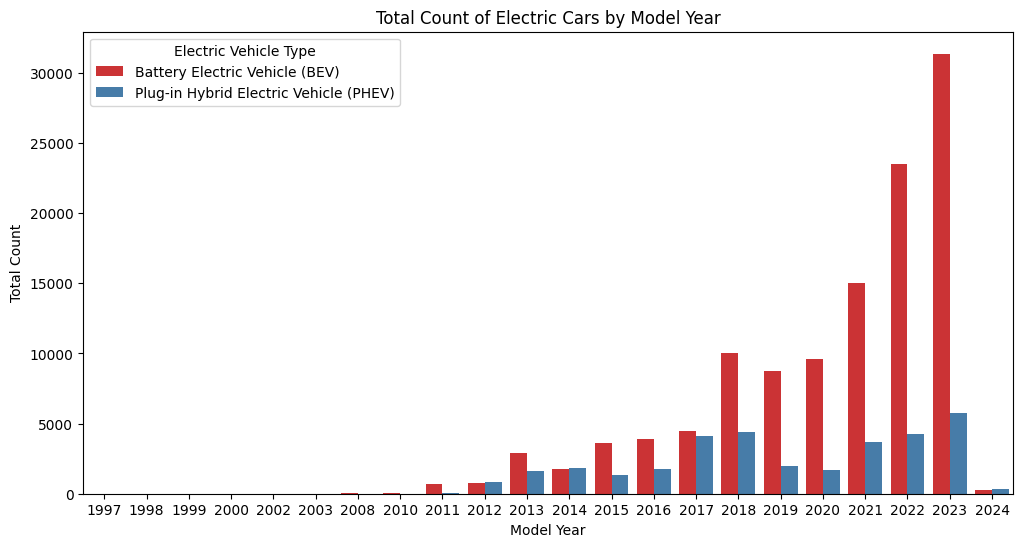

In [32]:
# Call GPT again with the same message list and display the response
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset to include only electric cars
electric_cars = electric_cars[electric_cars['electric_vehicle_type'].str.contains('Electric Vehicle', case=False)]

# Group by model year and electric vehicle type to get the total count
count_by_year_type = electric_cars.groupby(['model_year', 'electric_vehicle_type'])['n_cars'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='model_year', y='n_cars', hue='electric_vehicle_type', data=count_by_year_type, palette='Set1')
plt.title('Total Count of Electric Cars by Model Year')
plt.xlabel('Model Year')
plt.ylabel('Total Count')
plt.legend(title='Electric Vehicle Type')
plt.show()


## Task 7: Execute the Code Provided by GPT to See Your Plot

Setting temperature to zero removed all randomness so you got the same output twice. That makes your workflow more reproducible.

The final task is to see the plot. As before, remember that GPT is only your assistant and you are the boss. Check the code and its output to make sure that you really have what you want.

### Instructions

Run the code and check that the plot is correct.

- Run the bar plot code generated by GPT.
- _Check that the output is suitable. If not, try changing your prompt in the previous task to improve the output (this is prompt engineering, which you'll see more of in the next code-along project in the series)._

In [ ]:
# Paste the code generated by GPT and run it


## Summary

You've now seen how to access GPT through the OpenAI API both directly and using LangChain.

You saw how GPT can be used to come up with ideas for analyses to perform and to write code for you.

You also saw how to have an extended conversation and how to control the reproducibility of the responses.